# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\howar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\howar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\howar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\howar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(q="bitcoin", language="en")
bitcoin['articles']

[{'source': {'id': 'the-verge', 'name': 'The Verge'},
  'author': 'Justine Calma',
  'title': 'Tesla’s $1.5 billion bitcoin purchase clashes with its environmental aspirations',
  'description': 'Tesla announced this week that it purchased $1.5 billion in bitcoin and plans to accept bitcoin as payment in the future. CEO Elon Musk might have boosted bitcoin’s credibility. But greenhouse gas emissions from bitcoin are on the rise as the price of the cry…',
  'url': 'https://www.theverge.com/2021/2/9/22275243/teslas-bitcoin-purchase-clashes-climate-change-mission',
  'urlToImage': 'https://cdn.vox-cdn.com/thumbor/eQST6cDSwG_MASzsxTUv3igFdxU=/0x430:6000x3571/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22293241/1231048263.jpg',
  'publishedAt': '2021-02-09T23:10:46Z',
  'content': 'Tesla, led by Elon Musk, confirmed that it purchased about $ 1.5 billion in bitcoin in January and expects to start accepting it as a payment in the future.\xa0 | Photo by Artur Widak/NurPhoto via G

In [7]:
# Fetch the Ethereum news articles
ethereum = newsapi.get_everything(q="ethereum",language="en")
ethereum

{'status': 'ok',
 'totalResults': 1916,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': 'NVIDIA limits RTX 3060 crypto speeds as it introduces mining cards',
   'description': "Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. The company has revealed that it's cutting the hash rate (mi…",
   'url': 'https://www.engadget.com/nvidia-limits-rtx-3060-for-crypto-mining-161657361.html',
   'urlToImage': 'https://s.yimg.com/uu/api/res/1.2/VLoRobjl1FcFEgV_0XjzqQ--~B/aD0xMDY3O3c9MTYwMDthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2021-02/cad5ae60-7200-11eb-bbbc-25bd3507e406.cf.jpg',
   'publishedAt': '2021-02-18T16:16:57Z',
   'content': 'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple 

In [8]:
# Print total articles
print(f"Total articles about bitcoin: {bitcoin['totalResults']}")

# Show sample article
bitcoin["articles"][0]

Total articles about bitcoin: 9508


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Justine Calma',
 'title': 'Tesla’s $1.5 billion bitcoin purchase clashes with its environmental aspirations',
 'description': 'Tesla announced this week that it purchased $1.5 billion in bitcoin and plans to accept bitcoin as payment in the future. CEO Elon Musk might have boosted bitcoin’s credibility. But greenhouse gas emissions from bitcoin are on the rise as the price of the cry…',
 'url': 'https://www.theverge.com/2021/2/9/22275243/teslas-bitcoin-purchase-clashes-climate-change-mission',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/eQST6cDSwG_MASzsxTUv3igFdxU=/0x430:6000x3571/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22293241/1231048263.jpg',
 'publishedAt': '2021-02-09T23:10:46Z',
 'content': 'Tesla, led by Elon Musk, confirmed that it purchased about $ 1.5 billion in bitcoin in January and expects to start accepting it as a payment in the future.\xa0 | Photo by Artur Widak/NurPhoto via Getty… [+

In [9]:
# Print total articles
print(f"Total articles about ethereum: {ethereum['totalResults']}")

# Show sample article
ethereum["articles"][0]

Total articles about ethereum: 1916


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': 'NVIDIA limits RTX 3060 crypto speeds as it introduces mining cards',
 'description': "Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. The company has revealed that it's cutting the hash rate (mi…",
 'url': 'https://www.engadget.com/nvidia-limits-rtx-3060-for-crypto-mining-161657361.html',
 'urlToImage': 'https://s.yimg.com/uu/api/res/1.2/VLoRobjl1FcFEgV_0XjzqQ--~B/aD0xMDY3O3c9MTYwMDthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2021-02/cad5ae60-7200-11eb-bbbc-25bd3507e406.cf.jpg',
 'publishedAt': '2021-02-18T16:16:57Z',
 'content': 'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [

In [10]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = pd.DataFrame.from_dict(bitcoin["articles"] )
bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Justine Calma,Tesla’s $1.5 billion bitcoin purchase clashes ...,Tesla announced this week that it purchased $1...,https://www.theverge.com/2021/2/9/22275243/tes...,https://cdn.vox-cdn.com/thumbor/eQST6cDSwG_MAS...,2021-02-09T23:10:46Z,"Tesla, led by Elon Musk, confirmed that it pur..."
1,"{'id': 'wired', 'name': 'Wired'}",Gregory Barber,Would You Trade a Bitcoin for a Tesla?,The maker of electric vehicles said it had inv...,https://www.wired.com/story/would-you-trade-bi...,https://media.wired.com/photos/6021da4ff1bf194...,2021-02-09T12:00:00Z,"For a brief moment on Sunday, before Tesla sai..."
2,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Manish Singh,Jack Dorsey and Jay Z invest $23.6 million to ...,Twitter and Square CEO Jack Dorsey and rapper ...,http://techcrunch.com/2021/02/12/jack-dorsey-a...,https://techcrunch.com/wp-content/uploads/2020...,2021-02-12T10:51:25Z,Twitter and Square CEO Jack Dorsey and rapper ...
3,"{'id': 'wired', 'name': 'Wired'}",WIRED Staff,This Cryptocurrency Is Really Burning a Hole i...,"This week, we discuss crypto’s role in the fut...",https://www.wired.com/story/gadget-lab-podcast...,https://media.wired.com/photos/602589a9e27a393...,2021-02-12T13:00:00Z,When Bitcoin first appeared out of digital thi...
4,"{'id': 'cnn', 'name': 'CNN'}",None,Is Bitcoin a safe bet?,The digital cryptocurrency Bitcoin has tripled...,https://www.cnn.com/videos/business/2021/02/20...,https://cdn.cnn.com/cnnnext/dam/assets/2102201...,2021-02-20T17:12:04Z,None


In [11]:
# Create the ethereum sentiment scores DataFrame
ethereum_df = pd.DataFrame.from_dict(ethereum["articles"] )
ethereum_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'engadget', 'name': 'Engadget'}",Jon Fingas,NVIDIA limits RTX 3060 crypto speeds as it int...,Worried that the GeForce RTX 3060 will be sold...,https://www.engadget.com/nvidia-limits-rtx-306...,https://s.yimg.com/uu/api/res/1.2/VLoRobjl1FcF...,2021-02-18T16:16:57Z,Worried that the GeForce RTX 3060 will be sold...
1,"{'id': 'mashable', 'name': 'Mashable'}",Stan Schroeder,What are NFTs? Everything you need to know.,NFTs are the latest cryptocurrency rage these ...,https://mashable.com/article/nft-explainer-wha...,https://mondrian.mashable.com/2021%252F03%252F...,2021-03-06T14:00:00Z,NFTs are the latest cryptocurrency rage these ...
2,"{'id': 'techcrunch', 'name': 'TechCrunch'}",David Riggs,"If you haven’t followed NFTs, here’s why you s...","Digital content has value, and crypto collecto...",http://techcrunch.com/2021/02/27/if-you-havent...,https://techcrunch.com/wp-content/uploads/2018...,2021-02-27T13:26:25Z,NFTs (non-fungible tokens) — or scarce digital...
3,"{'id': 'engadget', 'name': 'Engadget'}",Richard Lawler,Remastered 'nyan cat' art sells for the equiva...,While the first Christie's auction of digital ...,https://www.engadget.com/nyan-cat-auction-nft-...,https://s.yimg.com/uu/api/res/1.2/KG2FppAKtY_v...,2021-02-20T11:48:30Z,While the first Christie's auction of digital ...
4,"{'id': None, 'name': 'Gizmodo.com'}",Joanna Nelius,Nvidia Is Making Graphics Cards Just for Crypt...,Attempting to get ahead of cryptocurrency mine...,https://gizmodo.com/nvidia-is-making-graphics-...,https://i.kinja-img.com/gawker-media/image/upl...,2021-02-18T17:46:00Z,Attempting to get ahead of cryptocurrency mine...


In [12]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments = []

for article in bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2021-02-09,"Tesla, led by Elon Musk, confirmed that it pur...",0.3818,0.071,0.000,0.929
1,2021-02-09,"For a brief moment on Sunday, before Tesla sai...",-0.1027,0.000,0.038,0.962
2,2021-02-12,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.000,0.944
3,2021-02-12,When Bitcoin first appeared out of digital thi...,0.1779,0.051,0.032,0.916
4,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887


In [13]:
# Describe the Ethereum Sentiment
ethereum_sentiments = []

for article in ethereum["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass
ethereum_df = pd.DataFrame(ethereum_sentiments)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818
1,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789
2,2021-02-27,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909
3,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970
4,2021-02-18,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.000,0.856


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lem = WordNetLemmatizer()

In [15]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
     # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', text)
    # Create a list of the words
    word_list = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem_list= [lem.lemmatize(word) for word in word_list]
    # Convert the words to lowercase
    lower_case_list = [word.lower()for word in lem_list]
   
    # Remove the stop words
    sw = set(stopwords.words('english'))
    tokens = [word for word in lower_case_list if word not in sw]

   

    return tokens




In [17]:
tokenizer(bitcoin_df["text"][0])

['tesla',
 'led',
 'elon',
 'musk',
 'confirmed',
 'purchased',
 'billion',
 'bitcoin',
 'january',
 'expects',
 'start',
 'accepting',
 'payment',
 'future',
 'photo',
 'artur',
 'widaknurphoto',
 'via',
 'getty',
 'char']

In [18]:
# Create a new tokens column for bitcoin
bitcoin_df["tokens"]=bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()   

,date,text,compound,positive,negative,neutral,tokens
0,2021-02-09,"Tesla, led by Elon Musk, confirmed that it pur...",0.3818,0.071,0.000,0.929,"[tesla, led, elon, musk, confirmed, purchased,..."
1,2021-02-09,"For a brief moment on Sunday, before Tesla sai...",-0.1027,0.000,0.038,0.962,"[brief, moment, sunday, tesla, said, invested,..."
2,2021-02-12,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.000,0.944,"[twitter, square, ceo, jack, dorsey, rapper, j..."
3,2021-02-12,When Bitcoin first appeared out of digital thi...,0.1779,0.051,0.032,0.916,"[bitcoin, first, appeared, digital, thin, air,..."
4,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887,"[thing, best, left, mystery, least, far, coinb..."


In [19]:
# Create a new tokens column for ethereum
ethereum_df["tokens"]=bitcoin_df["text"].apply(tokenizer)
ethereum_df.head()   

,date,text,compound,positive,negative,neutral,tokens
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818,"[tesla, led, elon, musk, confirmed, purchased,..."
1,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789,"[brief, moment, sunday, tesla, said, invested,..."
2,2021-02-27,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909,"[twitter, square, ceo, jack, dorsey, rapper, j..."
3,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970,"[bitcoin, first, appeared, digital, thin, air,..."
4,2021-02-18,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.000,0.856,"[thing, best, left, mystery, least, far, coinb..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
word_counts = Counter(bitcoin_df)
print(dict(word_counts))

{'date': 1, 'text': 1, 'compound': 1, 'positive': 1, 'negative': 1, 'neutral': 1, 'tokens': 1}


In [22]:
# Generate the Bitcoin N-grams where N=2
bitcoin_ngrams = ngrams(tokenizer(bitcoin_df.text.str.cat()), n=2)
Counter(bitcoin_ngrams).most_common(20)

[(('billion', 'bitcoin'), 2),
 (('jay', 'z'), 2),
 (('cryptocurrency', 'exchange'), 2),
 (('alltime', 'high'), 2),
 (('daily', 'crunch'), 2),
 (('crunch', 'february'), 2),
 (('investment', 'giveaway'), 2),
 (('tesla', 'led'), 1),
 (('led', 'elon'), 1),
 (('elon', 'musk'), 1),
 (('musk', 'confirmed'), 1),
 (('confirmed', 'purchased'), 1),
 (('purchased', 'billion'), 1),
 (('bitcoin', 'january'), 1),
 (('january', 'expects'), 1),
 (('expects', 'start'), 1),
 (('start', 'accepting'), 1),
 (('accepting', 'payment'), 1),
 (('payment', 'future'), 1),
 (('future', 'photo'), 1)]

In [23]:
bitcoin_df.text.str.cat()


"Tesla, led by Elon Musk, confirmed that it purchased about $ 1.5 billion in bitcoin in January and expects to start accepting it as a payment in the future.\xa0 | Photo by Artur Widak/NurPhoto via Getty… [+6118 chars]For a brief moment on Sunday, before Tesla said it had invested $1.5 billion in bitcoin and planned to let people use the cryptocurrency to pay for its cars, bitcoins price could be expressed with a … [+3302 chars]Twitter and Square CEO Jack Dorsey and rapper Jay Z have created an endowment to fund bitcoin development initially in Africa and India, Dorsey said Friday.\r\nThe duo is putting 500 bitcoin, which is … [+3984 chars]When Bitcoin first appeared out of digital thin air, it was hailed as having the potential to upend the way people spent money. But more than a decade later, cryptocurrency is still only trickling in… [+2039 chars]Some things are best left a mystery at least as far as Coinbase is concerned.\xa0\r\nThe San Francisco-based cryptocurrency exchange has b

In [24]:
word_count_eth = Counter(ethereum_df)
print(dict(word_counts))

{'date': 1, 'text': 1, 'compound': 1, 'positive': 1, 'negative': 1, 'neutral': 1, 'tokens': 1}


In [25]:
# Generate the Ethereum N-grams where N=2
ethereum_ngrams = ngrams(tokenizer(ethereum_df.text.str.cat()), n=2)
Counter(ethereum_ngrams).most_common(20)

[(('charsby', 'reuters'), 5),
 (('record', 'high'), 5),
 (('feb', 'reuters'), 4),
 (('charsnew', 'york'), 4),
 (('reuters', 'staffsingapore'), 3),
 (('reuters', 'cryptocurrencies'), 3),
 (('hit', 'record'), 3),
 (('cryptocurrency', 'miner'), 2),
 (('nonfungible', 'token'), 2),
 (('staffsingapore', 'feb'), 2),
 (('cryptocurrencies', 'extended'), 2),
 (('reuters', 'stafffile'), 2),
 (('stafffile', 'photo'), 2),
 (('photo', 'logo'), 2),
 (('york', 'reuters'), 2),
 (('reuters', 'ethereum'), 2),
 (('ethereum', 'second'), 2),
 (('second', 'largest'), 2),
 (('largest', 'cryptocurrency'), 2),
 (('cryptocurrency', 'term'), 2)]

In [26]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [27]:
# Get the top 10 words for Bitcoin
token_count(tokenizer(bitcoin_df.text.str.cat()))

[('bitcoin', 10),
 ('cryptocurrency', 6),
 ('ha', 5),
 ('tesla', 4),
 ('said', 3),
 ('dorsey', 3),
 ('exchange', 3),
 ('recent', 3),
 ('investment', 3),
 ('company', 3)]

In [28]:
# Get the top 10 words for Ethereum
token_count(tokenizer(ethereum_df.text.str.cat()))

[('reuters', 14),
 ('ethereum', 10),
 ('cryptocurrency', 9),
 ('week', 7),
 ('bitcoin', 7),
 ('ha', 6),
 ('high', 6),
 ('charsby', 5),
 ('record', 5),
 ('new', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

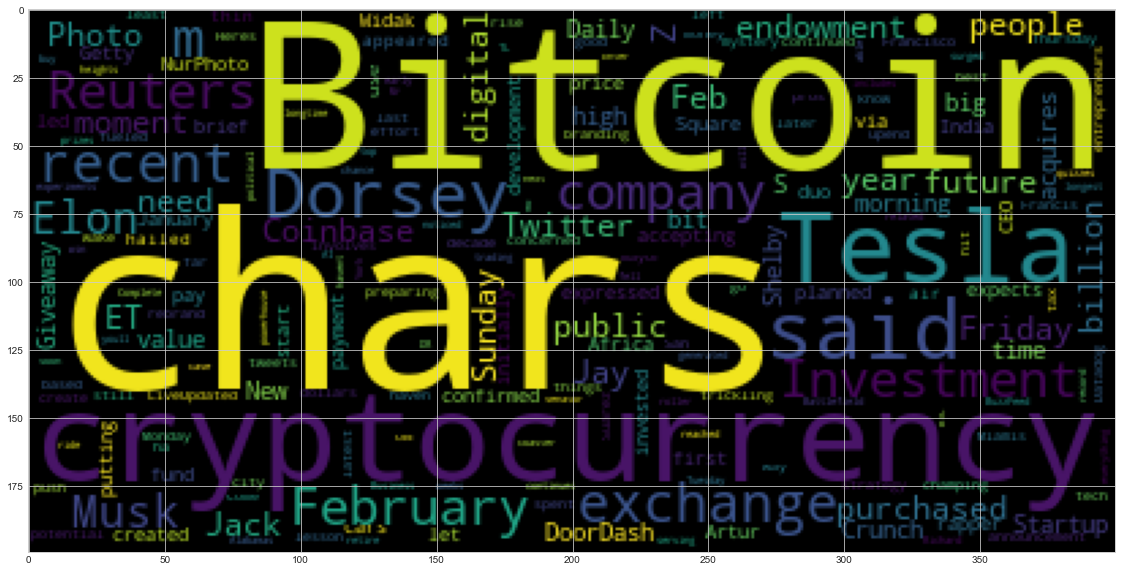

In [30]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_df.text.str.cat())
plt.imshow(wc)

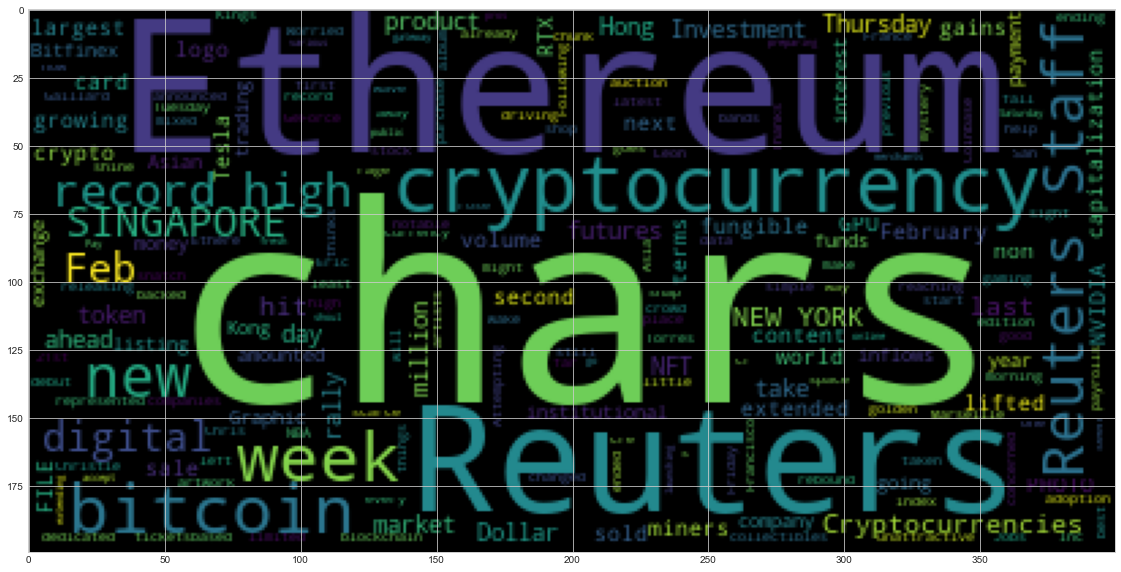

In [31]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_df.text.str.cat())
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [32]:
import spacy
from spacy import displacy

In [33]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [34]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [35]:
# Concatenate all of the bitcoin text together
bitcoin_cat =bitcoin_df.text.str.cat()

In [36]:
# Run the NER processor on all of the text
doc=nlp(bitcoin_cat)
doc
# Add a title to the document
doc.user_data["title"]="Bitcoin NER"
doc.user_data

{'title': 'Bitcoin NER'}

In [37]:
# Render the visualization
displacy.render(doc,jupyter=True, style="ent")

In [38]:
# List all Entities
for entity in doc.ents:
    print (entity.text,entity.label_)


Tesla ORDINAL
Elon Musk PERSON
about $ 1.5 billion MONEY
bitcoin GPE
January DATE
Artur Widak PERSON
Getty PERSON
Sunday DATE
Tesla ORDINAL
$1.5 billion MONEY
bitcoin GPE
Square PERSON
Jack Dorsey PERSON
Jay Z PERSON
Africa LOC
India GPE
Dorsey GPE
Friday DATE
500 CARDINAL
Bitcoin GPE
first ORDINAL
more than a decade later DATE
Coinbase ORG
San Francisco GPE
last year DATE
Thursday DATE
Feb. 9, 2021 DATE
8:01 a.m. TIME
ET PERSON
Feb. 9, 2021 DATE
8:01 a.m. TIME
ET PERSON
Bitcoin GPE
Teslas GPE
Monday DATE
1.5 MONEY
this morning TIME
over $50,000 MONEY
Elon Musks ORG
Francis Suarez PERSON
Dorsey PERSON
Jay Z PERSON
Datadog PERSON
Startup ORG
BuzzFeed ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Bitcoins PERSON
recent weeks DATE
Friday DATE
BTC ORG
Investment Giveaway PERSON
over $12,000 MONEY
The Bitcoin Investment Giveaway EVENT
CNN ORG
Business)Bitcoin PRODUCT
58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
mo PERSON
chars]6 MONEY
Richard Shelby PERSON
next year 

---

## Ethereum NER

In [39]:
# Concatenate all of the ethereum text together
ethereum_cat =ethereum_df.text.str.cat()

In [40]:
# Run the NER processor on all of the text
docs=nlp(ethereum_cat)
docs 

# Add a title to the document
docs.user_data["title"]="Ethereum NER"
docs.user_data

{'title': 'Ethereum NER'}

In [41]:
# Render the visualization
displacy.render(docs,jupyter=True, style="ent")

In [42]:
# List all Entities
for entity in docs.ents:
    print (entity.text,entity.label_)

these days DATE
Kings PERSON
Leon PERSON
NBA ORG
millions CARDINAL
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
one CARDINAL
Chris Torres PERSON
3060 CARDINAL
GPU ORG
next week DATE
Nvidia ORG
this morning TIME
Reuters ORG
SINGAPORE ORG
Feb 9 DATE
Reuters ORG
Asia LOC
Tuesday DATE
bitcoin GPE
Tesla Inc ORG
bitcoin GPE
Reuters ORG
Bitcoin GPE
Marseille GPE
France GPE
February 7, 2021 DATE
REUTERS ORG
Eric Gaillard PERSON
SINGAPORE PERSON
Reuters ORG
YORK PERSON
Reuters ORG
second ORDINAL
Thursday DATE
YORK PERSON
Feb 18 PERSON
Reuters ORG
second ORDINAL
Thursday DATE
Friday DATE
Bitcoin GPE
Tesla ORDINAL
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ORG
the week DATE
1,935.57 MONEY
the week DATE
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex PERSON
Bitfinex Pay PERSON
YORK PERSON
Reuters ORG
$245 million MONEY
last week DATE
80% PERCENT
Reuters ORG
Reuters ORG
Bitcoin GPE
Asian NORP
Saturday DATE
two-month DATE
$1 trilli